## Practical 5: Objects

From Functions to Classes

This is a very challenging notebook because it takes you *both* through
the process of building a function incrementally *and* through a
‘simple’ example of how Python classes actually work. You will need to
understand these two very different elements in order to make the most
of the remaining 6 weeks of term, because we both improve our code
incrementally *and* make use of objects and their inheritances
extensively. You also get an extra chance to revisit the differences
between LoLs and DoLs because you will undoubtedly encounter and make
use of these data structures even *after* you become a skillfull Python
programmer.

> **Warning**
>
> This is a very challenging practical and you should do your best to
> ensure that you actually understand what you have done and why.

> **Group Sign-Up**
>
> You should now make it a priority [Sign
> Up](https://forms.office.com/e/2ij0sWHnpR)!

## 1. Why ‘Obvious’ is Not Always ‘Right’ (Revisited)

Practical 3 is hard, so I want to provide *another* chance for the
concepts to bed in before we use them in an *object-oriented way through
Pandas*. Yes, Week 5 will show how we combine concepts covered over the
preceding two weeks in *practice* to ‘do data science’.

First, remember the finding from last week: if we don’t really care
about column order, then a dictionary of lists is a nice way to handle
data. And why should we care about column order? With our CSV file we
saw what a pain it was to fix things when even a tiny thing like the
layout of the columns changed. But if, instead, we could just reference
the ‘Description’ column in the data set then it doesn’t matter where
that column actually is *and* we would know that all the descriptions
would be *text*, while all the populations or prices would be *numbers*.
Why is that?

> **🔗 Connections**
>
> This task briefly recaps the final part of the previous practical and
> builds on the [DOLs to
> Data](https://jreades.github.io/fsds/sessions/week3.html#lectures) and
> [Functions](https://jreades.github.io/fsds/sessions/week4.html#lectures)
> lectures.

### 1.1 The Way That Doesn’t Work

Recall that this is how four rows of ‘data’ for city sizes organised by
*row* as a list-of-lists look:

In [1]:
myData = [
    ['id', 'Name', 'Rank', 'Longitude', 'Latitude', 'Population'], 
    ['1', 'Greater London', '1', '-18162.92767', '6711153.709', '9787426'], 
    ['2', 'Greater Manchester', '2', '-251761.802', '7073067.458', '2553379'], 
    ['3', 'West Midlands', '3', '-210635.2396', '6878950.083', '2440986']
]

To print out a list of every city in the data set *when* we don’t know
where the `Name` column is in the file we have to jump through some
hoops:

In [4]:
cities = []

col    = myData[0].index('Name')
for i in range(1, len(myData)):
    cities.append(myData[i][col])

print("The cities in the data set are: " + ", ".join(cities))

The cities in the data set are: Greater London, Greater Manchester, West Midlands


And it’s the same kind of faff if we want to find out if `Edinburgh` is
included in the data set:

In [7]:
col   = myData[0].index('Name')
found = False
for i in range(1, len(myData)):
    if myData[i][col] == 'Edinburgh':
        print("Found Edinburgh in the data set!")
        found = True
        break

if found == False:
    print("Didn't find Edinburgh in the data set.")

Didn't find Edinburgh in the data set.


### 1.2 The Way That Does Work

Compare that code to how it works for a dictionary-of-lists organised by
*column*. Now try printing out the cities in the data:

In [9]:
myData = {
    'id'         : [0, 1, 2, 3, 4, 5],
    'Name'       : ['Greater London', 'Greater Manchester', 'Birmingham','Edinburgh','Inverness','Lerwick'],
    'Rank'       : [1, 2, 3, 4, 5, 6],
    'Longitude'  : [-0.128, -2.245, -1.903, -3.189, -4.223, -1.145],
    'Latitude'   : [51.507, 53.479, 52.480, 55.953, 57.478, 60.155],
    'Population' : [9787426, 2705000, 1141816, 901455, 70000, 6958],
}

To print out a list of every city in the data set:

In [10]:
print(", ".join(myData['Name'])) #将 myData中Name列的所有元素合并成一个字符串，并在元素之间用逗号和空格分隔

Greater London, Greater Manchester, Birmingham, Edinburgh, Inverness, Lerwick


To find out if `Edinburgh` is included in the list of data:

In [11]:
if 'Edinburgh' in myData['Name']:
    print("Found Edinburgh in the data set!")
else:
    print("Didn't find Edinburgh in the data set.")

Found Edinburgh in the data set!


See how even basic questions like “Is Edinburgh in our list of data?”
are suddenly easy to answer? We no longer need to loop over the entire
data set in order to find one data point. In addition, we know that
everything in the ‘Name’ column will be a string, and that everything in
the ‘Longitude’ column is a float, while the ‘Population’ column
contains integers. So that’s made life easier already. But let’s test
this out and see how it works.

## 2. Appending a Column

### 2.1 Calculate Mean

Let’s start by calculating the sample mean (use Google:
`Python numpy mean...`):

In [12]:
import numpy as np
# Use numpy functions to calculate mean and standard deviation
mean = np.mean(myData['Population'])
print(f"City distribution has a mean of {mean:,.0f}.") #保留整数

City distribution has a mean of 2,435,442.


### 2.2 Calculate Standard Deviation

> **Difficulty level: Low-ish.**

Now let’s do the standard deviation:

##### 2.2.0.1 Question

In [13]:
import numpy as np
# Use numpy functions to calculate mean and standard deviation
std  = np.std(myData['Population'])
print(f"City distribution has a standard deviation of {std:,.2f}.")

City distribution has a standard deviation of 3,406,947.93.


So the `numpy` package gives us a way to calculate the mean and standard
deviation *quickly* and without having to reinvent the wheel. The other
potentially new thing here is `{std:,.2f}`. This is about [string
formatting](https://www.w3schools.com/python/ref_string_format.asp) and
the main thing to recognise is that this means ‘format this float with
commas separating the thousands/millions and 2 digits to the right’. The
link I’ve provided uses the slightly older approach of `<str>.format()`
but the formatting approach is the same.

### 2.3 For Loops Without For Loops

> **Difficulty level: Medium.**

Now we’re going to see something called a **List Comprehension**.

In Python you will see code like this a lot: `[x for x in list]`. This
syntax is known as a ‘list comprehension’ and is basically a `for` loop
on one line with the output being assigned to a list. So we can apply an
operation (converting to a string, subtracting a value, etc.) to every
item in a list without writing out a full for loop.

Here’s a quick example just to show you what’s going on:

In [10]:
demo = range(0,10) # <- a *range* of numbers between 0 and 9 (stop at 10)
print([x**2 for x in demo]) # square every element of demo

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

Now let’s apply this to our problem. We calculated the the mean and
standard deviation above, so now we want to apply the z-score formula to
every element of the Population list… Remember that the format for the
z-score (when dealing with a sample) is:

$$
z = \frac{x - \bar{x}}{s}
$$

And the population standard deviation (by which I mean, if you are
dealing with *all* the data, and not a subsample as we are here) is:

$$
z = \frac{x - \mu}{\sigma}
$$

##### 2.3.0.1 Question

In [14]:
rs = [(x - mean)/std for x in myData['Population']] # rs == result set
print([f"{x:.3f}" for x in rs])

['2.158', '0.079', '-0.380', '-0.450', '-0.694', '-0.713']


### 2.4 Appending

> **Difficulty level: trivial**

And now let’s add it to the data set:

In [15]:
myData['Std. Population'] = rs
print(myData['Std. Population'])

[2.1579383252868527, 0.0791199354729932, -0.3797024575689938, -0.45025269939207097, -0.6942995760276591, -0.7128035277711219]


And just to show how everything is in a single data structure:

In [16]:
for c in myData['Name']:
    idx = myData['Name'].index(c)
    print(f"{c} has a population of {myData['Population'][idx]:,} and standardised score of {myData['Std. Population'][idx]:.3f}")

Greater London has a population of 9,787,426 and standardised score of 2.158
Greater Manchester has a population of 2,705,000 and standardised score of 0.079
Birmingham has a population of 1,141,816 and standardised score of -0.380
Edinburgh has a population of 901,455 and standardised score of -0.450
Inverness has a population of 70,000 and standardised score of -0.694
Lerwick has a population of 6,958 and standardised score of -0.713


## 3. ‘Functionalising’

Let’s start trying to pull what we’ve learned over the past two weeks
together by creating a a set of functions that will help us to:

1.  Download a file from a URL (checking if it has already *been*
    downloaded to save bandwidth).
2.  Parse it as a CSV file and…
3.  Convert it to a Dictionary-of-Lists
4.  Perform some simple calculations using the resulting data.

To be honest, there’s not going to be much about writing our *own*
objects here, but we will be making use of them and, conceptually, an
understanding of objects and classes is going to be super-useful for
understanding what we’re doing in the remainder of the term!

### 3.1 Downloading from a URL

Let’s focus on the first part *first* because that’s the precondition
for everything else. If we can get the ‘download a file from a URL’
working then the rest will gradually fall into place through *iterative*
improvments!

#### 3.1.1 Finding an Existing Answer

> **Difficulty level: Low**

First, let’s be sensibly lazy–we’ve already written code to read a file
from the Internet and turn it into a list of lists. So I’ve copy+pasted
that into the code block below since we’re going to start from this
point; however, just to help you check your own understanding, I’ve
removed a few bits and replaced them with `??`. Sorry, it’s good
practice. 😈

##### 3.1.1.1 Question

In [18]:
from urllib.request import urlopen
import csv

url = "https://raw.githubusercontent.com/jreades/fsds/master/data/src/Wikipedia-Cities-simple.csv"

urlData = [] # Somewhere to store the data

response = urlopen(url) # Get the data using the urlopen function
csvfile  = csv.reader(response.read().decode('utf-8').splitlines()) # Pass it over to the reader

for row in csvfile:
    urlData.append(row)

print("urlData has " + str(len(urlData)) + " rows and " + str(len(urlData[0])) + " columns.")
print(urlData[-1]) # Check it worked!

urlData has 11 rows and 4 columns.
['Bangor', '18808', '53.228', '-4.128']


You should get:

<code>urlData has 11 rows and 4 columns.</code> <br /> <code>\[‘Bangor’,
‘18808’, ‘53.228’, ‘-4.128’\]</code>

#### 3.1.2 Getting Organised

> **Difficulty level: Low**

Let’s take the code above and modify it so that it is:

1.  A function that takes two arguments: a URL; and a destination
    filename.
2.  Implemented as a function that checks if a file exists already
    before downloading it again.

You will find that the `os` module helps here because of the `path`
function. And you will [need to
Google](https://lmgtfy.app/?q=check+if+file+exists+python) how to test
if a file exists. I would normally select a StackOverflow link in the
results list over anything else because there will normally be an
*explanation* included of why a particular answer is a ‘good one’. I
also look at which answers got the most votes (not always the same as
the one that was the ‘accepted answer’). In this particular case, I also
found [this
answer](https://careerkarma.com/blog/python-check-if-file-exists/)
useful.

I would start by setting my inputs:

In [21]:
import os
url = "https://raw.githubusercontent.com/jreades/fsds/master/data/src/Wikipedia-Cities-simple.csv"
out = os.path.join('data','Wikipedia-Cities.csv') # Print `out` if you aren't sure what this has done!

#### 3.1.3 Sketching the Function

> **Difficulty level: Low, if you’ve watched the videos…**

Then I would sketch out how my function will work using comments. And
the simplest thing to start with is checking whether the file has
already been downloaded:

##### 3.1.3.1 Question

In [22]:
from urllib.request import urlopen

def get_url(src, dest):
    
    # Check if dest exists -- if it does
    # then we can skip downloading the file,
    # otherwise we have to download it!
    if os.path.isfile(dest):
        print(f"{dest} found!")
    else:
        print(f"{dest} *not* found!")
        
get_url(url, out)

data/Wikipedia-Cities.csv *not* found!


#### 3.1.4 Fleshing Out the Function

> **Difficulty level: Medium**
>
> If you really explore what’s going on in the function rather than just
> running it and moving on.

I would then flesh out the code so that it downloads the file if it
isn’t found and then, either way, returns the *local* file path for our
CSV reader to extract:

In [23]:
def get_url(src, dest):
    
    # Check if dest does *not* exist -- that
    # would mean we had to download it!
    if os.path.isfile(dest):
        print(f"{dest} found locally!")
    else:
        print(f"{dest} not found, downloading!")
        
        # Get the data using the urlopen function
        response = urlopen(src) 
        filedata = response.read().decode('utf-8')
        
        # os.path.split(dest)返回文件路径, 通过 [:-1] 切片只保留目录路径，不包括文件名
        path = list(os.path.split(dest)[:-1])  
        
        # Create any missing directories in dest(ination) path
        # -- os.path.join is the reverse of split (as you saw above)
        # but it doesn't work with lists... so I had to google how 
        # to use the 'splat' operator! os.makedirs creates missing 
        # directories in a path automatically.
        if len(path) >= 1 and path[0] != '': #确保 path列表不为空
            #将 path 列表中的元素连接成一个完整的路径字符串
            os.makedirs(os.path.join(*path), exist_ok=True) 

        #以写入模式 ('w') 打开目标文件 dest。如果文件不存在，会自动创建；如果存在，会覆盖其内容
        with open(dest, 'w') as f:
            f.write(filedata) #将变量 filedata 的内容写入到文件 dest 中
            
        print(f"Data written to {dest}!")
    
    return dest
        
# Using the `return contents` line we make it easy to 
# see what our function is up to.
src = get_url(url, out)

data/Wikipedia-Cities.csv not found, downloading!
Data written to data/Wikipedia-Cities.csv!


### 3.2 Decorating!

Let’s now look into simplifying this code using a dectorator! Our
function has become a bit unwieldy and we want to look at how we can
simplify that.

The ‘obvious’ (i.e. not obvious) way to do this is to implement the
check for a local copy as a decorator on the downloading function. So we
have a function that downloads, and a decorator function that checks if
the download should even be triggered.

In [25]:
from functools import wraps
def check_cache(f):
    @wraps(f) #保持被装饰函数的名称和文档字符串等元属性不被替换
    def wrapper(*args, **kwargs):
        src  = args[0] #第一个位置参数src
        dest = args[1] #第二个位置参数dest
        if os.path.isfile(dest): #检查dest是否存在
            print(f"{dest} found locally!")
            return(dest)
        else:
            print(f"{dest} not found, downloading!")
            return(f(src, dest))
    return wrapper

@check_cache
def get_url(src, dest):    #src是来源url，dest是本地文件路径
    # Get the data using the urlopen function
    response = urlopen(src) 
    filedata = response.read().decode('utf-8')
     
    # Extract the part of the dest(ination) that is *not*
    # the actual filename--have a look at how 
    # os.path.split works using `help(os.path.split)`
    path = list(os.path.split(dest)[:-1])
     
    # Create any missing directories in dest(ination) path
    # -- os.path.join is the reverse of split (as you saw above)
    # but it doesn't work with lists... so I had to google how 
    # to use the 'splat' operator! os.makedirs creates missing 
    # directories in a path automatically.
    if len(path) >= 1 and path[0] != '':
        os.makedirs(os.path.join(*path), exist_ok=True)
     
    with open(dest, 'w') as f:
        f.write(filedata)
         
    print(f"Data written to {dest}!")
    
    return dest
        
# Using the `return contents` line we make it easy to 
# see what our function is up to.
src = get_url(url, out)

data/Wikipedia-Cities.csv found locally!


I’m not going to pretend that’s the *best* use of a decorator, but it
*does* neatly separate the downloading function from the caching
function. In fact, there is already a [cache
decorator](https://pvsravanth.medium.com/speeding-up-your-python-code-with-the-cache-decorator-from-functools-bce4731eed69)
and some of these have unlimited capacity; however, they are intended to
run in a ‘live’ context, so you’d still need to download the file again
any time you start a new notebook or restart Docker. This caching
function saves the actual data locally to `dest`.

> **Stop!**
>
> It really would be a good idea to put in the effort to make sense of
> how this function works. There is a lot going on here and
> understanding how this function works will help you to understand how
> to code. You should notice that we don’t try to check if the data file
> contains any useful data! So if you download or create an empty file
> while testing, you won’t necessarily get an error until you try to
> turn it into data afterwards!

### 3.3 Parse the CSV File

> **Difficulty: Low**

Now we turn to the next task: parsing the file if it’s a CSV. This
implies that it *might* not be so that’s something we should also
consider!

##### 3.3.0.1 Question

In [27]:
import csv

def read_csv(src):
    
    csvdata = []
    with open(src, 'r') as f: #'r' 是打开文件的模式，表示以只读模式打开文件
        csvr = csv.reader(f) ## 使用 csv.reader 读取 CSV 文件
        
        for r in csvr:
            csvdata.append(r) # 把每行数据保存到列表
    
    # Return list of lists
    return csvdata

read_csv(src)
#read_csv('foo.bar') # <- Notice what happens if you try to run this code
#read_csv('Practical-04-Objects-Answers.ipynb') # Or this code!

[['City', 'Population', 'Latitude', 'Longitude'],
 ['Perth', '45770', '56.39583', '-3.43333'],
 ['Armagh', '14777', '54.3499', '-6.6546'],
 ['Dundee', '147268', '56.462', '-2.9707'],
 ['Colchester', '194706', '51.88861', '0.90361'],
 ['Salisbury', '40302', '51.07', '-1.79'],
 ['Portsmouth', '205056', '50.80583', '-1.08722'],
 ['Wakefield', '325837', '53.683', '-1.499'],
 ['Bradford', '522452', '53.792', '-1.754'],
 ['Lancaster', '138375', '54.047', '-2.801'],
 ['Bangor', '18808', '53.228', '-4.128']]

You should get:

<code> \[\[‘City’, ‘Population’, ‘Latitude’, ‘Longitude’\], \[‘Perth’,
‘45770’, ‘56.39583’, ‘-3.43333’\], \[‘Armagh’, ‘14777’, ‘54.3499’,
‘-6.6546’\], \[‘Dundee’, ‘147268’, ‘56.462’, ‘-2.9707’\],
\[‘Colchester’, ‘194706’, ‘51.88861’, ‘0.90361’\], \[‘Salisbury’,
‘40302’, ‘51.07’, ‘-1.79’\], \[‘Portsmouth’, ‘205056’, ‘50.80583’,
‘-1.08722’\], \[‘Wakefield’, ‘325837’, ‘53.683’, ‘-1.499’\],
\[‘Bradford’, ‘522452’, ‘53.792’, ‘-1.754’\], \[‘Lancaster’, ‘138375’,
‘54.047’, ‘-2.801’\], \[‘Bangor’, ‘18808’, ‘53.228’, ‘-4.128’\]\]
</code>

### 3.4 Convert the CSV into a DoL

> **Difficulty: Medium.**

Now we can focus on converting the CSV data to a dictionary-of-lists!
We’re going to start with the *same* function name but expand what the
function *does*. This kind of *iteration* is common in software
development.

##### 3.4.0.1 Question

In [28]:
def read_csv(src):
    
    csvdata = {} # An empty dictionary-of-lists
    
    with open(src, 'r') as f:
        csvr = csv.reader(f)
        
        # Read in our column names and
        # initialise the dictionary-of-lists
        # 读取标题行并初始化字典的键
        csvcols = next(csvr)  #使用 next() 读取文件的第一行，通常为列名，并将其存储在 csvcols 列表中
        # 对于每个列名 c，初始化一个空列表 csvdata[c] = []，这样每个列名都对应一个空列表
        for c in csvcols:
            csvdata[c] = []
        
        # Notice this code is still the same, 
        # we just used next(csvr) to get the 
        # header row first!
        ## 逐行读取数据并按列名添加到字典中
        for r in csvr: 
            # Although you can often assume that the order 
            # of the keys is the same, Python doesn't 
            # guarantee it; this way we will always make
            # the correct assignment.
            for idx, c in enumerate(csvcols):
                csvdata[c].append(r[idx]) # 按列名添加数据
    
    # Return dictionary of lists
    return csvdata

read_csv(src)

{'City': ['Perth',
  'Armagh',
  'Dundee',
  'Colchester',
  'Salisbury',
  'Portsmouth',
  'Wakefield',
  'Bradford',
  'Lancaster',
  'Bangor'],
 'Population': ['45770',
  '14777',
  '147268',
  '194706',
  '40302',
  '205056',
  '325837',
  '522452',
  '138375',
  '18808'],
 'Latitude': ['56.39583',
  '54.3499',
  '56.462',
  '51.88861',
  '51.07',
  '50.80583',
  '53.683',
  '53.792',
  '54.047',
  '53.228'],
 'Longitude': ['-3.43333',
  '-6.6546',
  '-2.9707',
  '0.90361',
  '-1.79',
  '-1.08722',
  '-1.499',
  '-1.754',
  '-2.801',
  '-4.128']}

You should get something that starts:

{'City': ['Perth', 'Armagh', 'Dundee', 'Colchester', 'Salisbury', 'Portsmou...

### 3.5 Adding Docstring

> **Difficulty: Low**

We’ve assumed that the first row of our data set is always a *header*
(i.e. list of column names). If it’s not then this code is going to have
problems. A *robust* function would allow us to specify column names,
skip rows, etc. when we create the data structure, but let’s not get
caught up in that level of detail. Notice that I’ve also, for the first
time:

1.  Used the docstring support offered by Python. You’ll be able to use
    `help(...)` and get back the docstring help!
2.  Provided hints to Python about the expected input and output data
    types. This can help to ensure consistency and is also critical in
    testing / continuous integration when working with others on a
    codebase.

In [31]:
def read_csv(src:str) -> dict:
    """
    Converts a CSV file to a dictionary-of-lists (dol),
    using the first row to create column names.
    
    param src: a local CSV file
    returns: a dictionary-of-lists
    """
    csvdata = {} # An empty dictionary-of-lists
    
    with open(src, 'r') as f:
        csvr = csv.reader(f)
        
        # Read in our column names and
        # initialise the dictionary-of-lists
        csvcols = next(csvr) 
        for c in csvcols:
            csvdata[c] = []
        
        # Notice this code is still the same, 
        # we just used next(csvr) to get the 
        # header row first!
        for r in csvr: 
            # Although you can often assume that the order 
            # of the keys is the same, Python doesn't 
            # guarantee it; this way we will always make
            # the correct assignment.
            for idx, c in enumerate(csvcols):
                csvdata[c].append(r[idx])
    
    # Return dictionary of lists
    return csvdata

ds = read_csv(src) #存储字典

In [30]:
help(read_csv)

Help on function read_csv in module __main__:

read_csv(src: str) -> dict
    Converts a CSV file to a dictionary-of-lists (dol),
    using the first row to create column names.
    
    param src: a local CSV file
    returns: a dictionary-of-lists



In [32]:
print("Columns are: " + ", ".join(ds.keys())) # +是字符串连接符，打印出所有列名，逗号隔开
print(f"First two cities are: {ds['City'][:2]}")
print(f"First two populations are: {ds['Population'][:2]}")
print(f"First two latitudes are: {ds['Latitude'][:2]}")

Columns are: City, Population, Latitude, Longitude
First two cities are: ['Perth', 'Armagh']
First two populations are: ['45770', '14777']
First two latitudes are: ['56.39583', '54.3499']


### 3.6 Creating a Package

We’re not going to tackle this now, but it’s important that you
understand how what we’ve done connects to what we’re *about* to do, and
the concept of a package is the bridge. We’ve already covered this in
the pre-recorded lectures, but if you want to actually *try* to create
your own package, the simplest way to do this is to:

1.  Copy the `read_csv` into a new file called, for instance,
    `utils.py`.
2.  Make sure you delete this function from the current ‘namespace’
    (`del(read_csv)`) by which I mean that the `read_csv` function no
    longer exists (running `help(read_csv)` should give you an error!).
3.  Try importing the function from the file:
    `from utils import read_csv` and run the `help(read_csv)` code
    again.

Assuming that you’ve done everything correctly, we’ve now brought in
code from another file without having to write it into our main Python
script file. In Python, many of the most complex libraries are spread
across the equivalent of *many* `utils.py` files, but on top of *that*
when we import and run them they are also creating objects from classes
defined in those files.

What we now want to do is use a fairly simple example using different
‘shapes’ (pyramids, cubes, etc.) that allow us to explore how classes
work through inheritance from parents and can extend of overwrite the
functionality provided by the parent class. We’ll need this
understanding in order to grasp how Pandas and GeoPandas work
specifically, but also how Python works more generally.

## 4. Classes and Inheritance

So, in the immortal words of Monty Python…

<figure>
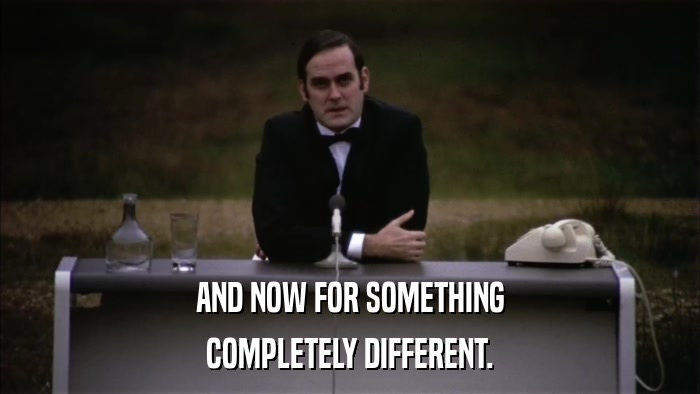
<figcaption aria-hidden="true">And now for something completely
different</figcaption>
</figure>

> **🔗 Connections**
>
> This will draw on what you’ve learned in the lectures about
> <a href="">Methods</a>, <a href="">Classes</a>, and
> <a href="">Design</a>. You will also find the Code Camp
> [Classes](https://jreades.github.io/code-camp/lessons/Classes.html)
> session useful.

To repeat myself:

> In Python, many of the most complex libraries are spread across the
> equivalent of *many* `utils.py` files, but on top of *that* when we
> import and run them they are also creating objects from classes
> defined in those files.
>
> What we now want to do is use a fairly simple example using different
> ‘shapes’ (pyramids, cubes, etc.) that allow us to explore how classes
> work through inheritance from parents and can extend of overwrite the
> functionality provided by the parent class. We’ll need this
> understanding in order to grasp how Pandas and GeoPandas work
> specifically, but also how Python works more generally.

> **Difficulty: 🤯.**

We want to create a set of ‘shapes’ that allow us to calculate various
properties of that shape:

-   Diameter: which we’ll define as the longest line that can be drawn
    across the inside of the shape.
-   Volume: the total volume of the shape.
-   Surface Area: the total outside area of the shape.

We will create all of these shape classes in the notebook so that we
know they work and then will move them to an external package file so
that they can be imported and re-used easily in other notebooks.

We’re also going to make use of a few features of Python:

-   You can access the class name of an instance using:
    `self.__class__.__name__`. And here’s one key point: `self` refers
    to the specific instance (to *this* particular shape that I’ve
    created), not to the class in general (to *all* shapes of the same,
    er, shape)… we’ll see why this matters.
-   You can raise your own exceptions easily if you don’t want to
    implement a particular method yet. This is giving you control over
    how your code behaves when something goes ‘wrong’ – as we’ve covered
    elsewhere sometimes an error is ‘expected’ and we want to handle the
    *exception*, other times it is ‘unexpected’ and we’re going to let
    Python fail so that the user knows something is seriously wrong.
-   You can have an ‘abstract’ base class that does nothing except
    provide a template for the ‘real’ classes so that different types of
    shapes can be used interchangeably. This is quite an advanced
    feature, but it gives our script a lot more flexibility: we don’t
    need to worry about whether we’re working with a sphere, cube, or
    pyramid (or a spatial or non-spatial data set) because they are
    defined in a way that allows this flexibility.

### 4.1 Abstract Base Class

This class appears to do very little, but there are two things to
notice:

1.  It provides a constructor (`__init__`) that sets the `shape_type` to
    the name of the class automatically (so a `square` object has
    `shape_type='Square'`) and it stores the critical dimension of the
    shape in `self.dim`.
2.  It provides methods (which only raise exceptions) that will allow
    one shape to be used in the place of any other shape that inherits
    from `shape`.

In [1]:
# Base class shape
class shape(object): # Inherit from base class 
    def __init__(self, dimension:float=None):
        #self.__class__.__name__ 返回当前实例的类名，capitalize() 方法将类名首字母大写
        self.shape_type = self.__class__.__name__.capitalize()
        self.dim = dimension
        return
    # 直径
    def diameter(self):
        raise Exception("Unimplmented method error.") # 未定义计算方法，需在子类中自行定义
    # 体积
    def volume(self):
        raise Exception("Unimplmented method error.")
    # 表面积
    def surface(self):
        raise Exception("Unimplmented method error.")
    # 类别    
    def type(self):
        return(self.shape_type)

We can now create a new shape object (an *instance* of the shape class)
but we can’t do much that is useful with it:

In [2]:
s = shape(15)

try: 
    print(f"I am a {s.type()}")
    print(f"My volume is {s.volume()}")
except Exception as e:
    print(f"Error: {e}")

I am a Shape
Error: Unimplmented method error.


### 4.2 Cube

Implements a cube:

1.  The diameter of the cube is given by the Pythagorean formula for the
    length of the hypotenuse in 3D between opposing corners:
    $\sqrt{d^{2} + d^{2} + d^{2}}$ which we can reduce to
    $\sqrt{3 d^{2}}$.
2.  A cube’s volume is given by $d^{3}$.
3.  A cube’s surface area will be the sum of its six faces: $6d^{2}$.

##### 4.2.0.1 Question

Can you work out the missing elements that will allow you to create a
cube class?

In [5]:
# Cube class
class cube(shape): # Inherit from shape 
    def __init__(self, dim:float):
        super().__init__(dim) # 调用父类 shape 的构造函数,并将 dim 参数传递给它
        return
    
    def diameter(self):
        return (3 * self.dim**2)**(1/2)
    
    def volume(self):
        return self.dim**3
    
    def surface(self):
        return 6*(self.dim**2)

# If you've done everything correctly then
# you will no longer get an error here...
s = cube(15)

try: 
    print(f"I am a {s.type()}")
    print(f"My diameter is {s.diameter():.0f}")
    print(f"My volume is {s.volume()}")
    print(f"My surface is {s.surface()}")
except Exception as e:
    print(f"Error: {e}")

I am a Cube
My diameter is 26
My volume is 3375
My surface is 1350


### 4.3 Sphere

Implements a sphere:

1.  The diameter is twice the critical dimension (radius): $2r$.
2.  The volume is $\frac{4}{3} \pi r^{3}$.
3.  The surface area will be $4 \pi r^{2}$.

If we were writing something more general, we’d probably have spheres as
a special case of an ellipsoid!

##### 4.3.0.1 Question

Can you work out the missing elements that will allow you to create a
cube class?

In [12]:
# Sphere class
from math import pi
class sphere(shape): # Inherit from shape
    def __init__(self, dim:float):
        super().__init__(dim)
        return

    def diameter(self):
        return 2*self.dim

    def volume(self):
        return (4/3)*pi*(self.dim**3)

    def surface(self):
        return 4*pi*(self.dim**2)

# If you've done everything correctly then
# you will no longer get an error here...
s = sphere(15)

try: 
    print(f"I am a {s.type()}")
    print(f"My volume is {s.volume():.2f}")
except Exception as e:
    print(f"Error: {e}")

I am a Sphere
My volume is 14137.17


### 4.4 Regular Pyramid

We’re taking this to be a regular pyramid where all sides are equal:

1.  The diameter is a line drawn across the base between opposing
    corners of the base so it’s just $\sqrt{d^{2} + d^{2}}$.
2.  The volume is given by $V = b * h / 3$ (where $b$ is the area of the
    base, which in this case becomes $d^{2} * h/3$).
3.  The surface area will be the base + 4 equilateral triangles:
    $d^{2} + 4 (d^{2}\sqrt{3}/4)$ which we can reduce to
    $d^{2} + d^{2}\sqrt{3}$

But this requires a *height* method that is specific to pyramids:

1.  The height is taken from the centre of the pyramid (which will be
    half the length of the hypotenuse for two edges):
    $l = \sqrt{d{^2} + d^{2}}$ and the long side ($d$ again) which gives
    us $\sqrt{l/2 + d^{2}}$.

> **Class Variables**
>
> Note that this has a **class variable** called `has_mummies` since
> Egyptian regular pyramids are plagued by them! This class variable is
> set automatically for *all* instances of the `pyramid` class. Changing
> this variable can have weird effects so they’re not *often* changed.

In [9]:
# Pyramid class
class pyramid(shape): # Inherit from shape

    has_mummies = True # This is for *all* regular pyramids

    def __init__(self, dim:float):
        super().__init__(dim)
        self.shape_type = 'Regular Pyramid'
        return

    def diameter(self):
        return (self.dim**2 + self.dim**2)**(1/2)

    def height(self):
        return (self.diameter()/2 + self.dim**2)**(1/2)

    def volume(self):
        return self.dim**2 * self.height() / 3

    def surface(self):
        return self.dim**2 + self.dim**2 * 3**(1/2)

### 4.5 Triangular Pyramid

We have chosen for triangular pyramid to *inherit* from regular pyramid.
However, this is kind of a judgement call since there’s very little
shared between the two types of pyramid and it’s arguable whether this
one is actually simpler and should therefore be the parent class…

Just to note, as well, that since all sides are equal this is an
*equilateral* triangular pyramid. Anyway, the calculations are:

1.  The diameter (longest line through the shape) will just be the edge:
    $d$.
2.  The volume $V = b * h / 3$ where $b$ is the area of an equilateral
    triangle.
3.  The surface area will be $4b$ where $b$ is the area of an
    equilateral triangle.

So we now need two new formulas:

1.  The height of the pyramid using ([Pythagoras
    again](https://www.youtube.com/watch?v=ivF3ndmkMsE)):
    $h = \sqrt{6}d/3$.
2.  The area of an equilateral triangle: $\frac{\sqrt{3}}{4} d^{2}$

Triangular pyramids do *not* have a problem with mummies.

Why don’t you add some documentation to this class and the regular
pyramid class so that we know how to use them correctly?

In [10]:
# Triangular Pyramid class
class t_pyramid(pyramid): # Inherit from regular pyramid

    has_mummies = False # This is for all triangular pyramids

    def __init__(self, dim:float):
        super().__init__(dim)
        self.shape_type = 'Triangular Pyramid'
        return

    def diameter(self):
        return self.dim

    def height(self):
        # h = sqrt(6)/3 * d
        return 6**(1/2)/3 * self.dim

    def base(self):
        return 3**(1/2)/4 * self.dim**2

    def volume(self):
        return (1/3) * self.base() * self.height()

    def surface(self):
        return 4 * self.base()

### 4.6 Testing Your Classes

If you’ve implemented everything correctly then the following code
should run.

``` python
# How would you test these changes?
s = sphere(10)
print(s.type())
print(f"\tVolume is: {s.volume():5.2f}")
print(f"\tDiameter is: {s.diameter():5.2f}")
print(f"\tSurface Area is: {s.surface():5.2f}")
print("")

c = cube(10)
print(c.type())
print(f"\tVolume is: {c.volume():5.2f}")
print(f"\tDiameter is: {c.diameter():5.2f}")
print(f"\tSurface Area is: {c.surface():5.2f}")
print("")

p = pyramid(10)
print(p.type())
print(f"\tVolume is: {p.volume():5.2f}")
print(f"\tDiameter is: {p.diameter():5.2f}")
print(f"\tSurface Area is: {p.surface():5.2f}")
print(f"\tHeight is: {p.height():5.2f}")
if p.has_mummies is True:
    print("\tMummies? Aaaaaaaaargh!")
else:
    print("\tPhew, no mummies!")
print("")

p2 = t_pyramid(10)
print(p2.type())
print(f"\tVolume is: {p2.volume():5.2f}")
print(f"\tDiameter is: {p2.diameter():5.2f}")
print(f"\tSurface Area is: {p2.surface():5.2f}")
print(f"\tHeight is: {p2.height():5.2f}")
if p2.has_mummies is True:
    print("\tMummies? Aaaaaaaaargh!")
else:
    print("\tPhew, no mummies!")
print("")

# Useful demonstration of how to find out if a method or attribute is
# associated with a particular object
if hasattr(p2,'base_area'):
    print(f"Shape of type '{p2.type()}' has attribute or method 'base_area'")
else:
    print(f"Shape of type '{p2.type()}' does *not* have attribute or method 'base_area'")
print("")
```

I get the following output:

In [13]:
s = sphere(10)
print(s.type())
print(f"\tVolume is: {s.volume():5.2f}")
print(f"\tDiameter is: {s.diameter():5.2f}")
print(f"\tSurface Area is: {s.surface():5.2f}")
print("")

c = cube(10)
print(c.type())
print(f"\tVolume is: {c.volume():5.2f}")
print(f"\tDiameter is: {c.diameter():5.2f}")
print(f"\tSurface Area is: {c.surface():5.2f}")
print("")

p = pyramid(10)
print(p.type())
print(f"\tVolume is: {p.volume():5.2f}")
print(f"\tDiameter is: {p.diameter():5.2f}")
print(f"\tSurface Area is: {p.surface():5.2f}")
print(f"\tHeight is: {p.height():5.2f}")
if p.has_mummies is True:
    print("\tMummies? Aaaaaaaaargh!")
else:
    print("\tPhew, no mummies!")
print("")

p2 = t_pyramid(10)
print(p2.type())
print(f"\tVolume is: {p2.volume():5.2f}")
print(f"\tDiameter is: {p2.diameter():5.2f}")
print(f"\tSurface Area is: {p2.surface():5.2f}")
print(f"\tHeight is: {p2.height():5.2f}")
if p2.has_mummies is True:
    print("\tMummies? Aaaaaaaaargh!")
else:
    print("\tPhew, no mummies!")
print("")

# Useful demonstration of how to find out if a method or attribute is
# associated with a particular object
if hasattr(p2,'base_area'):
    print(f"Shape of type '{p2.type()}' has attribute or method 'base_area'")
else:
    print(f"Shape of type '{p2.type()}' does *not* have attribute or method 'base_area'")
print("")

Sphere
	Volume is: 4188.79
	Diameter is: 20.00
	Surface Area is: 1256.64

Cube
	Volume is: 1000.00
	Diameter is: 17.32
	Surface Area is: 600.00

Regular Pyramid
	Volume is: 344.92
	Diameter is: 14.14
	Surface Area is: 273.21
	Height is: 10.35
	Mummies? Aaaaaaaaargh!

Triangular Pyramid
	Volume is: 117.85
	Diameter is: 10.00
	Surface Area is: 173.21
	Height is:  8.16
	Phew, no mummies!

Shape of type 'Triangular Pyramid' does *not* have attribute or method 'base_area'



### 4.7 Packaging It Up

Wait, you’re *still* working on this practical and haven’t thrown up
your hands in disgust yet? OK, in that case you can have *one* more
thing to do: turn all the shapes into a package that can be loaded via
an `import` statement.

#### 4.7.1 Cell Magic

This code allows Jupyter to reload external libraries if they are edited
after you import them. When you are working on your own packages this is
rather useful since you tend to make a *lot* of mistakes when packaging
code up this way and it’s handy not to have to restart the entire
notebook every time you fix a typo or change a function.

``` python
%load_ext autoreload
%autoreload 2
```

#### 4.7.2 Import Shapes

My suggestion is that you create a directory called `shapes` and copy
all of the shape code (that’s the code for `shape`, `cube`, `sphere`,
`pyramid`, `tpyramid`) into a file called `__init__.py` inside the
`shapes` directory. You should then able to run the following:

``` python
for s in ['shape','sphere','cube','pyramid','t_pyramid']:
    if s in locals():
        del(s)
from shapes import *
```

We need those first three lines of code to delete the existing classes
from Python’s ‘memory’ so that we can be sure we’re importing the
versions we saved to `shapes/__init__.py`.

#### 4.7.3 Adding Documentation

In an ideal world, this would also be the time to properly document your
classes and methods. Here as some examples that you could add to the
`__init__.py` package file.

Underneath the line `class shape(object):`, add:

``` python
    """Abstract base class for all ideal shape classes.

    Keyword arguments:
    dimension -- the principle dimension of the shape (default None)
    """
```

Underneath the line `def type(self):`, add:

``` python
        """
        Returns the formatted name of the shape type. 
        
        This is set automatically, but can be overwritten by setting the attribute shape_type.
        
        :returns: the name of the class, so shapes.cube is a `Cube` shape type
        :rtype: str
        """
```

This would then allow you to run:

``` python
from shapes import * # <-- Change this if you didn't call your package `shapes`!
help(shape)
help(shape.type)
```

In [14]:
%load_ext autoreload
%autoreload 2

In [23]:
for s in ['shape','sphere','cube','pyramid','t_pyramid']:
    if s in locals():
        del(s)
from shapes import *

In [24]:
from shapes import * # <-- Change this if you didn't call your package `shapes`!
help(shape)
help(shape.type)

Help on class shape in module shapes:

class shape(builtins.object)
 |  shape(dimension: float = None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dimension: float = None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  diameter(self)
 |  
 |  surface(self)
 |  
 |  type(self)
 |  
 |  volume(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables
 |  
 |  __weakref__
 |      list of weak references to the object

Help on function type in module shapes:

type(self)



In [25]:
from shapes import *
s = sphere(10)
try:
    print(f"I am a {s.type()}")
    print(f"My diameter is {s.diameter():.2f}")
    print(f"My volume is {s.volume():.2f}")
    print(f"My surface is {s.surface():.2f}")
except Exception as e:
    print(f"Error: {e}")

I am a Sphere
My diameter is 20.00
My volume is 4188.79
My surface is 1256.64
